# Remote Work Survey Analysis


Survey results of 1,500 remote workers from the Australian state of New South Wales, taken in August-September 2020 and March-April 2021, which aimed to capture the shift in remote work experiences and attitudes during different stages of the COVID-19 pandemic and gain insights on its long term implications.

<b>Recommended Analysis </b>

1) How has the COVID pandemic impacted the amount of work done remotely? What can be expected post-pandemic?

2) Does working remotely positively impact productivity? Are there any other benefits?

3) How does an employees use of time differ when working remotely vs on-site?

4) What are the biggest barriers to overcome if remote work becomes the norm in
the future?



In [1]:
#importing useful libraries for this analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# set the max columns and rows to none
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#use a grey background
sns.set(style="darkgrid")

In [2]:
#importing the data.
df_2020 = pd.read_csv("2020_rws_3.csv")

df_2021 = pd.read_csv("2021_rws_2.csv")

## Survey Analysis for 2020

In [3]:
df_2020.tail(1)

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,How long have you been in your current job?,Metro / Regional,"Thinking about your current job, how much of your time did you spend remote working last year?","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - It was common for people in my organisation to work remotely","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - It was easy to get permission to work remotely","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely","Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others",How much of your time would you have preferred to work remotely last year?,"Thinking about your current job, how much of your time did you spend remote working in the last 3 months?","Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely","Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely","Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - It was common for people in my organisation to work remotely","Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - It was easy to get permission to work remotely","Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely","Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others",How much of your time would you have preferred to work remotely in the last 3 months?,"Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?",Imagine that COVID-19 is cured or eradicated. How likely would you consider the following statements? - My employer would encourage more remote working,Imagine that COVID-19 is cured or eradicated. How likely would you consider the following statements? - My employer would make changes to support remote working,Imagine that COVID-19 is cured or eradicated. How likely would you consider the following statements? - I would have more choice about whether I work remotely,"Please compare your productivity when you work remotely to when you work at your employers workplace. Roughly how productive are you, each hour, when you work remotely?","On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Preparing for work and commuting","On a day when you attend your employers workplace, how many hours would you spend doing t

In [4]:
"""
 Dropping irrelavant columns for my analysis
"""

df_2020.drop(["Response ID", "Which of the following best describes your industry? (Detailed)", 
             "Which of the following best describes your current occupation? (Detailed)"], axis = 1, inplace = True)

In [5]:
"""
    Renaming the columns
"""
df_2020.rename(columns = {"What year were you born?":"Date of Birth"
                          , "What is your gender?":"Gender"}, inplace = True)

In [7]:
"""
    Checking the data types and completeness of each column.
    We see missing data in some columns and all the columns have the correct data-type
"""

print(df_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 70 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                              --------------  -----  
 0   Date of Birth                                         

In [8]:
#Create a new column for this year
df_2020['Current Year'] = dt.datetime.now().year

In [9]:
#Create a new column to know the Age of each respondent
df_2020["Age"] = df_2020['Current Year'] - df_2020["Date of Birth"] 

In [10]:
df_2020.drop(columns = {"Current Year"}, inplace = True)

In [11]:
#Removing duplicates from our data
df_2020.drop_duplicates(inplace = True)

In [12]:
"""
    To identify the number of errors in each column
"""
df_2020.isnull().sum()

Date of Birth                                                                                                                                                                                                                                                                                                                                                                                           0
Gender                                                                                                                                                                                                                                                                                                                                                                                                  0
Which of the following best describes your industry?                                                                                                                                                                

In [13]:
#get the mode of each column and replace the NULLS with it
df_2020 = df_2020.fillna(df_2020.mode().iloc[0])

In [14]:
#Verify that the replacement works as planned
df_2020.isnull().sum().sum()

0

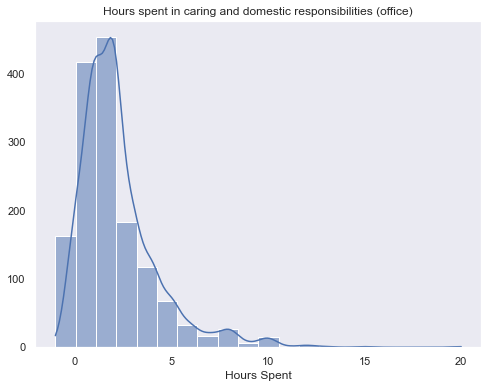

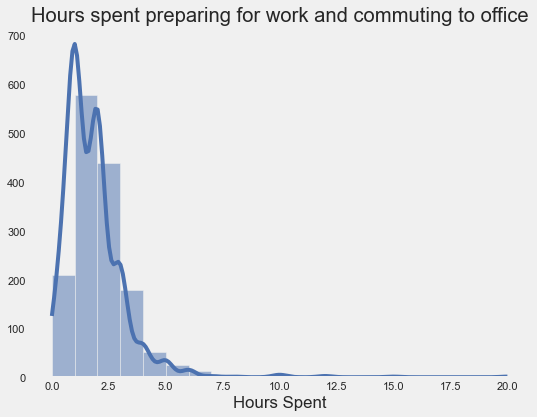

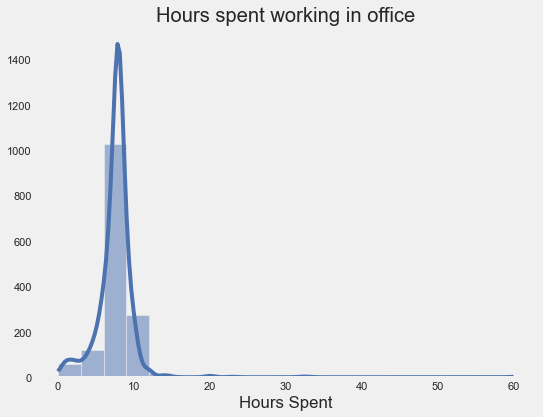

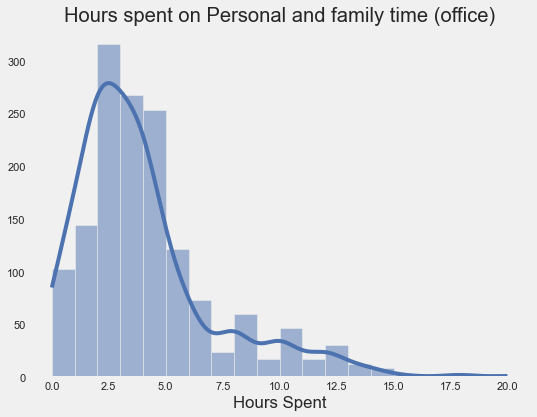

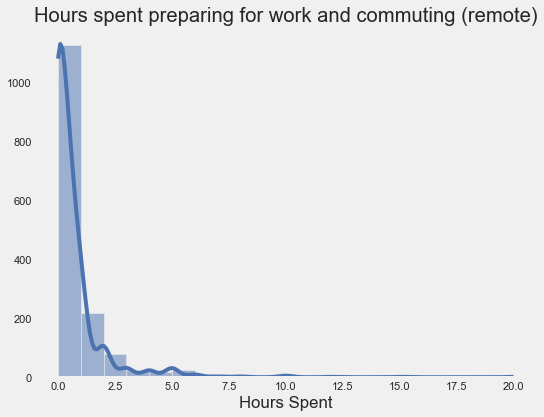

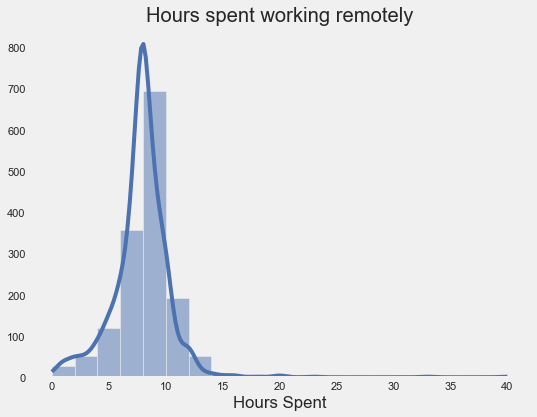

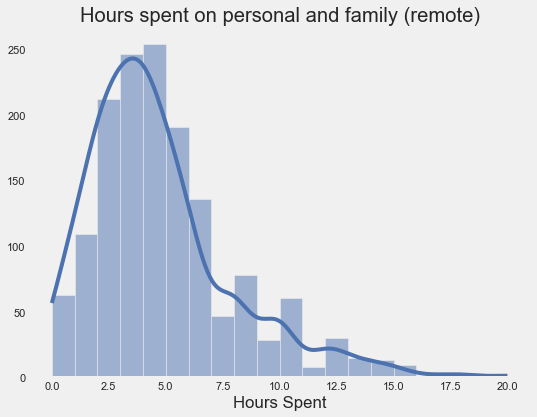

In [15]:
"""
    To check the skewness of those numerical columns
    Clearly, they are right skewed so using a mean as a central tendency would be incorrect
"""

def outlier(data, col, title):    
    plt.figure(figsize = (8,6))
    ax = sns.histplot(
        data=data, x=col, kde=True, bins = 20)

    plt.xlabel("Hours Spent")
    plt.title(title)
    plt.style.use("fivethirtyeight")
    ax.set(ylabel=None)
    ax.grid(False)
    plt.show()

outlier(df_2020, "On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Caring and domestic responsibilities"
       , "Hours spent in caring and domestic responsibilities (office)")


outlier(df_2020, "On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Preparing for work and commuting",
       "Hours spent preparing for work and commuting to office")


outlier(df_2020, "On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Working", 
       "Hours spent working in office")

outlier(df_2020, "On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Personal and family time",
       "Hours spent on Personal and family time (office)")

outlier(df_2020, "On a day when you do remote work, how many hours would you spend doing the following activities? - Preparing for work and commuting", 
       "Hours spent preparing for work and commuting (remote)")

outlier(df_2020, "On a day when you do remote work, how many hours would you spend doing the following activities? - Working",
       "Hours spent working remotely")

outlier(df_2020, "On a day when you do remote work, how many hours would you spend doing the following activities? - Personal and family time",
       "Hours spent on personal and family (remote)")














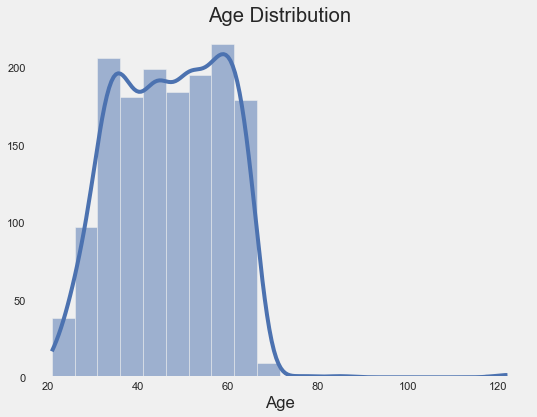

The average age of the respondents: 47


In [16]:
"""
    Because of the presence of outliers in the age, we can't use the mean to get the average age.
    Hence, the average age of the respondents is 47 years. This shows, we're dealing with mid-senior level professionals
"""


plt.figure(figsize = (8,6))
ax = sns.histplot(
        data=df_2020, x="Age", kde=True, bins = 20)

plt.xlabel("Age")
plt.title("Age Distribution")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None)
ax.grid(False)
plt.show()

#show the average age of the respondents
print("The average age of the respondents: %d"%(df_2020["Age"].median()))


In [17]:
"""
    Average. I used Median instead of mode because of outliers (the right skewness tells us so)
"""

def avg(data, col):
    average = data[col].median()
    return (average)


print("During the Pandemic")
print("="*100)
print("Average time spent preparing and commuting to work (in-office):", avg(df_2020, "On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Preparing for work and commuting"), "hours")
print("Average time spent on personal and family time (in-office):", avg(df_2020, "On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Personal and family time"), "hours")
print("Average time spent working in-office:", avg(df_2020, "On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Working"), "hours")
print("Average time spent on caring and domestic responsibilities (in-office):", avg(df_2020, "On a day when you attend your employers workplace, how many hours would you spend doing the following activities? - Caring and domestic responsibilities"), "hours")
print("Average time spent preparing and commuting for work (remote):", avg(df_2020, "On a day when you do remote work, how many hours would you spend doing the following activities? - Preparing for work and commuting"), "hours")
print("Average time spent working remotely:", avg(df_2020, "On a day when you do remote work, how many hours would you spend doing the following activities? - Working"), "hours")
print("Average time spent on personal and family time (remote):", avg(df_2020, "On a day when you do remote work, how many hours would you spend doing the following activities? - Personal and family time"), "hours")
print("Average time spent on caring and domestic responsibilities (remote):", avg(df_2020, "On a day when you do remote work, how many hours would you spend doing the following activities? - Caring and domestic responsibilities"), "hours")






During the Pandemic
Average time spent preparing and commuting to work (in-office): 1.5 hours
Average time spent on personal and family time (in-office): 3.0 hours
Average time spent working in-office: 8.0 hours
Average time spent on caring and domestic responsibilities (in-office): 2.0 hours
Average time spent preparing and commuting for work (remote): 0.3 hours
Average time spent working remotely: 8.0 hours
Average time spent on personal and family time (remote): 4.0 hours
Average time spent on caring and domestic responsibilities (remote): 2.0 hours


In [18]:

"""
    The following function to display the values on a seaborn barplot:

"""
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

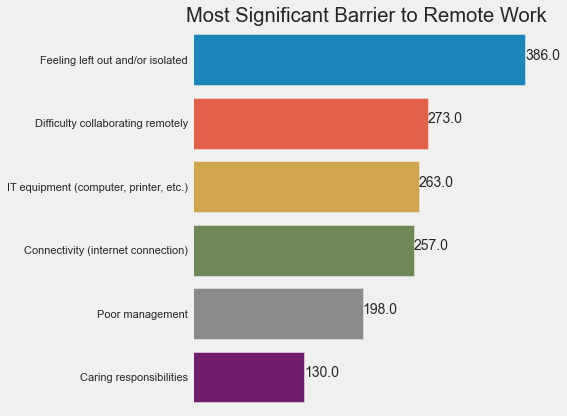

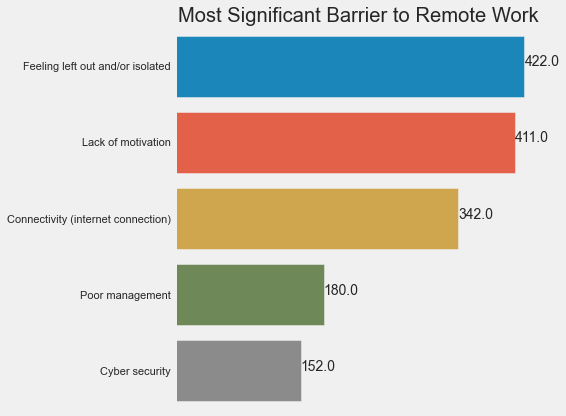

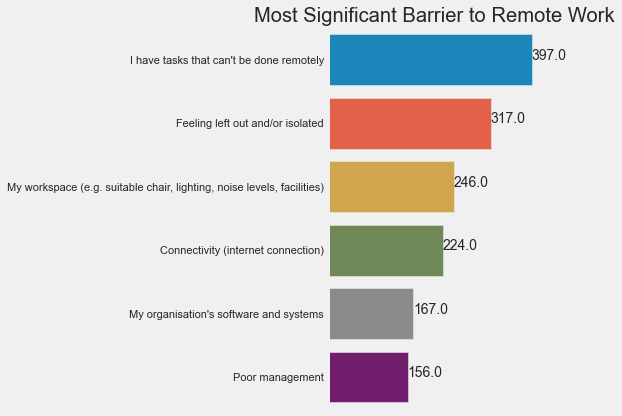

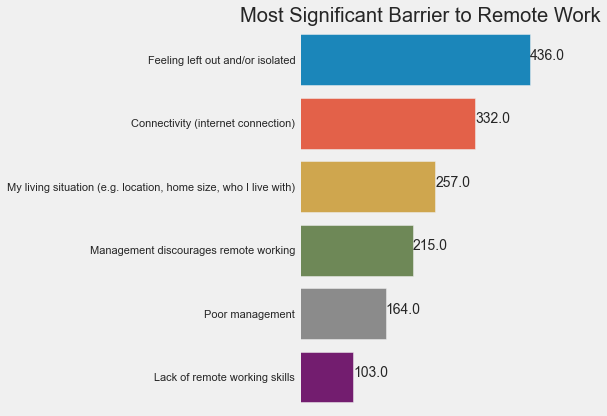

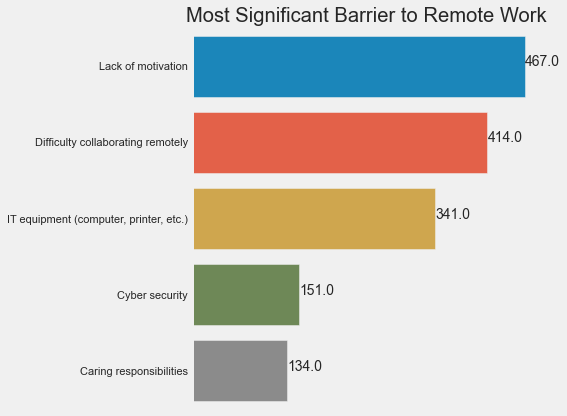

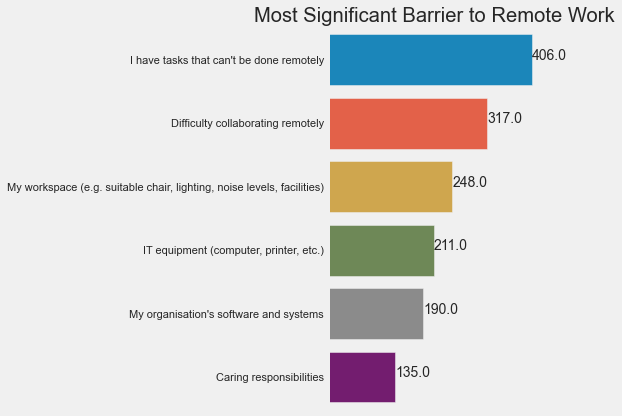

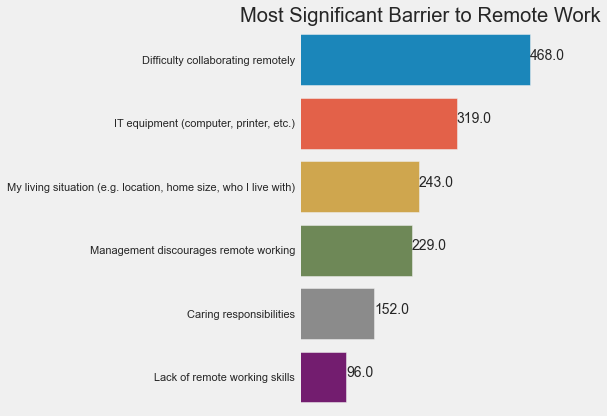

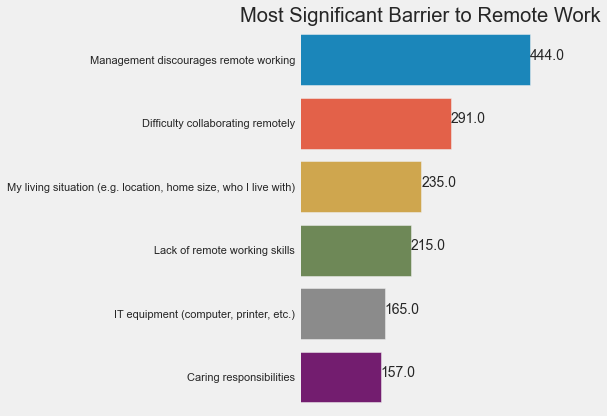

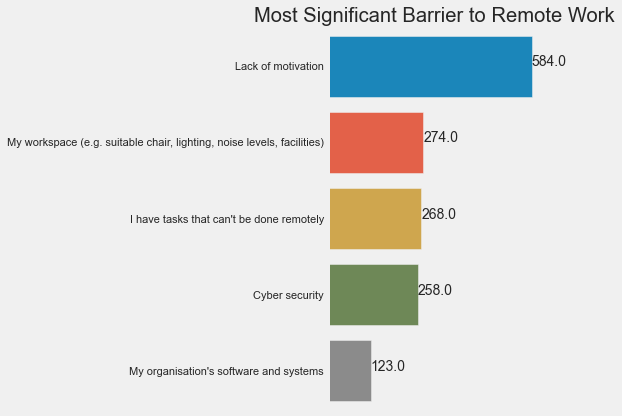

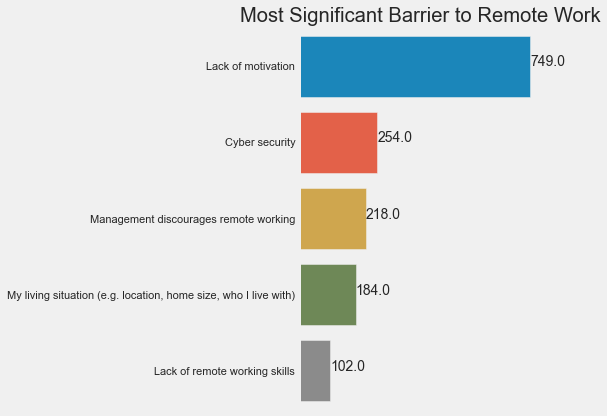

In [19]:
#countplot function
"""
    The biggest barriers to remote work are:
    1) Lack of motivation
    2) Feeling left out or isolated
    3) Internet connectivity issues
    4) Tasks that can't be done remotely
    5) Difficulty collaborating remotely
    6) Management discourages remote work
"""
def counterplot(data, col):    
    plt.figure(figsize = (8,6))
    ax = sns.countplot(y = col,data = data, order = df_2020[col].value_counts().index)
    
    show_values(ax, "h", space=0)
    
    ax.axes.xaxis.set_visible(False)

    plt.xlabel("Frequency")
    plt.title("Most Significant Barrier to Remote Work")
    plt.style.use("fivethirtyeight")
    ax.set(ylabel=None)
    ax.grid(False)

    plt.tight_layout()


counterplot(df_2020, 'From the following, please select the most significant barrier to doing your work remotely - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities')
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; Cyber security ; Lack of motivation ; Lack of motivation")
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely")
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working")
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; Cyber security ; Lack of motivation ; Lack of motivation")
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely")
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working")
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - Cyber security ; Lack of motivation ; Lack of motivation ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely")
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - Cyber security ; Lack of motivation ; Lack of motivation ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working")
counterplot(df_2020, "From the following, please select the most significant barrier to doing your work remotely - My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working")
#counterplot(df_2020, "")






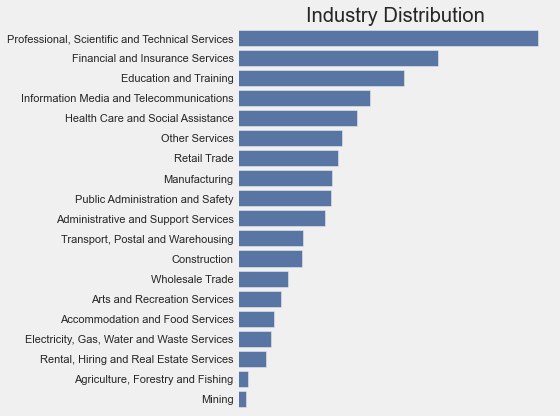

In [20]:
#Industry distribution.

"""
    Most of the respondents work in the professional, scientific, and technical services
    Second is Financial and Technical Services. Third is Education and Training.
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Which of the following best describes your industry?",data = df_2020
                  ,order = df_2020["Which of the following best describes your industry?"].value_counts().index
                   , color = "b")

ax.axes.xaxis.set_visible(False)

plt.title("Industry Distribution")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None)
ax.grid(False)

plt.tight_layout()


/Users/victoragboli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


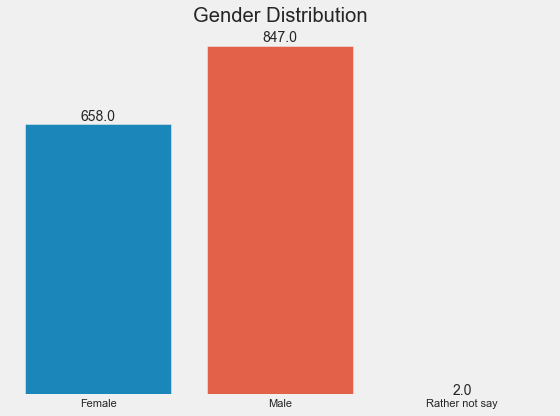

In [21]:
#Gender Dsitribution. We had more males than female for this survey. 

plt.figure(figsize = (8,6))
ax = sns.countplot(df_2020["Gender"])
plt.title("Gender Distribution")
plt.ylabel("Frequency")
plt.style.use("fivethirtyeight")
ax.set(xlabel=None)
ax.grid(False)
ax.axes.yaxis.set_visible(False)
show_values(ax, "v", space=0)


plt.tight_layout()

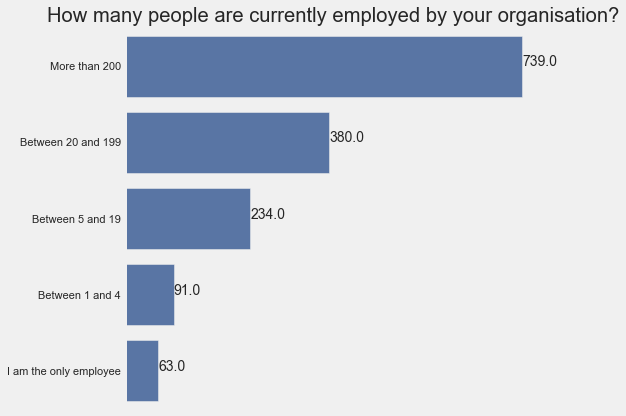

In [22]:
"""
    Most of the respondents work for organizations with large teams. 
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "How many people are currently employed by your organisation?",data = df_2020
                  ,order = df_2020["How many people are currently employed by your organisation?"].value_counts().index
                   , color = "b")

plt.title("How many people are currently employed by your organisation?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)
ax.axes.xaxis.set_visible(False)
show_values(ax, "h", space=0)


plt.tight_layout()


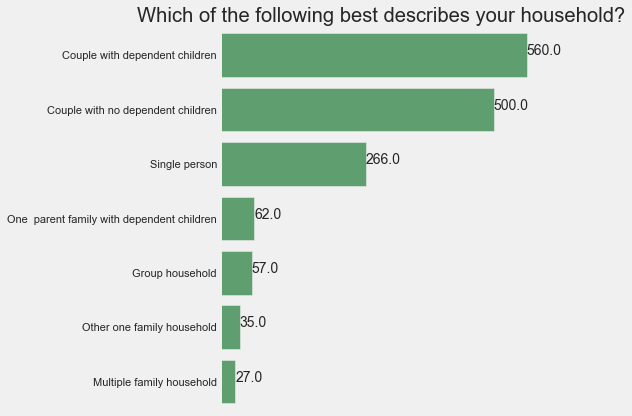

In [23]:
"""
    Majority of the respondents are
    1) Couples with dependent children
    2) Couples with no dependent children
    3) Single persons.
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Which of the following best describes your household?",data = df_2020
                  ,order = df_2020["Which of the following best describes your household?"].value_counts().index
                   , color = "g")

plt.title("Which of the following best describes your household?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None)
ax.grid(False)
ax.axes.xaxis.set_visible(False)
show_values(ax, "h", space=0)

plt.tight_layout()

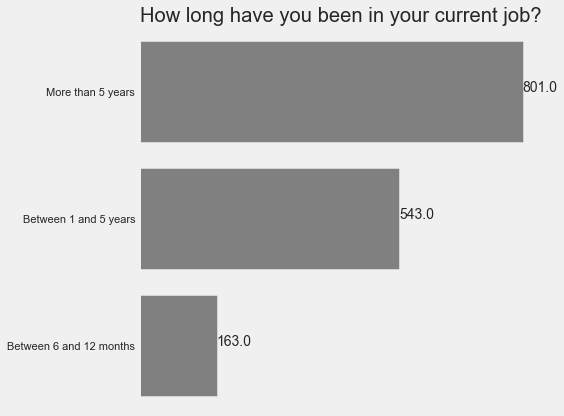

In [24]:
"""
    How long have you been in your current job?
    Majority of the respondents have spent more than 5 years at their current job. 
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "How long have you been in your current job?",data = df_2020
                  ,order = df_2020["How long have you been in your current job?"].value_counts().index
                   , color = "grey")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("How long have you been in your current job?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

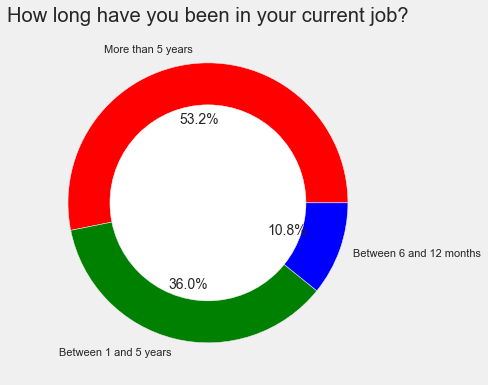

In [25]:
"""
    Majority of the respondents have spent more than five years in their job
"""
  
plt.figure(figsize = (8,6))


names = df_2020["How long have you been in your current job?"].value_counts().index
  

marks = df_2020["How long have you been in your current job?"].value_counts().unique()
  
# Create a circle at the center of
# the plot
my_circle = plt.Circle((0, 0), 0.7, color='white')
  
# Give color names
plt.pie(marks, labels=names, autopct='%1.1f%%',
        colors=['red', 'green', 'blue'])

plt.title("How long have you been in your current job?")
p = plt.gcf()
p.gca().add_artist(my_circle)
  
# Show the graph
plt.show()

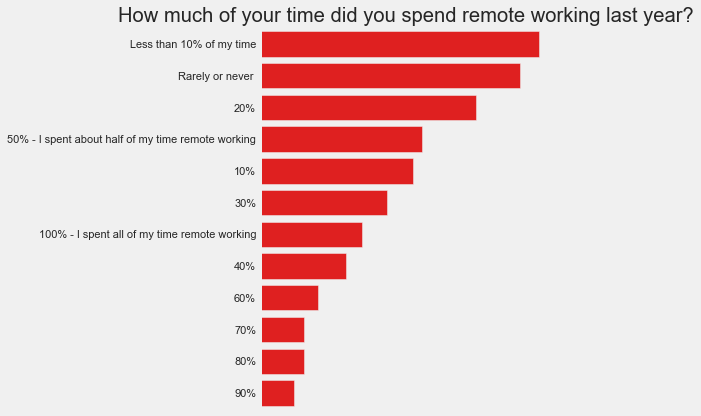

In [26]:
"""
    Thinking about your current job, how much of your time did you spend remote working last year?
    Before the Covid-19, majority of the respondents spent more of their time working in-office. 
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Thinking about your current job, how much of your time did you spend remote working last year?",data = df_2020
                  ,order = df_2020["Thinking about your current job, how much of your time did you spend remote working last year?"].value_counts().index
                   , color = "red")

#show values on barplot
#show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("How much of your time did you spend remote working last year?")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

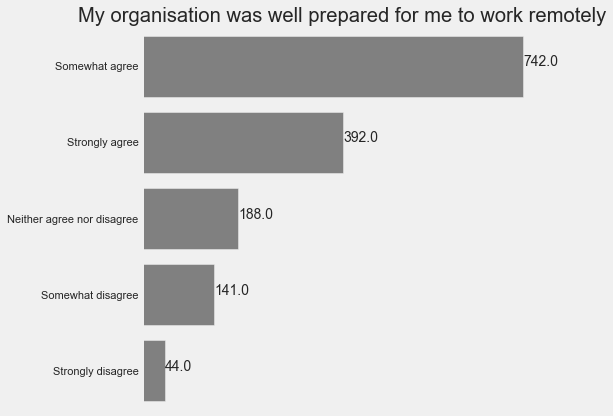

In [27]:
"""
    Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely
    Majority of the respondents agrees that before COVID-19, their organization was well prepared to allow them work remotely
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely",data = df_2020
                  ,order = df_2020["Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely"].value_counts().index
                   , color = "grey")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("My organisation was well prepared for me to work remotely")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()





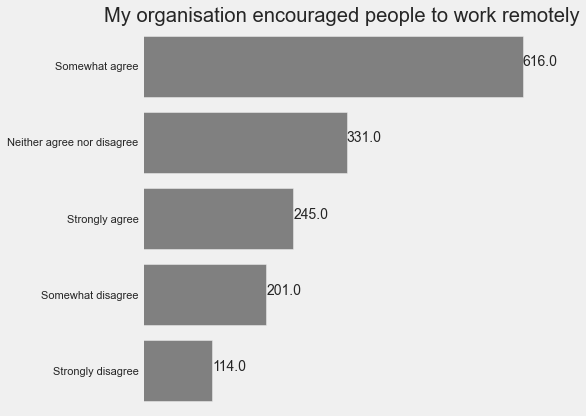

In [28]:
"""
    Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely
    Majority of the respondents agree that last year, their organizations encouraged remote working. 
"""


plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely",data = df_2020
                  ,order = df_2020["Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely"].value_counts().index
                   , color = "grey")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("My organisation encouraged people to work remotely")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()




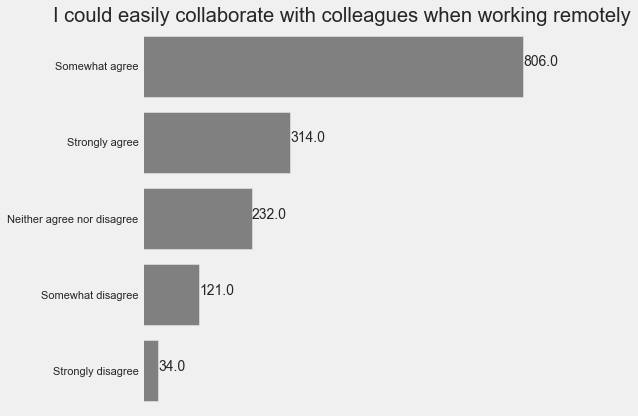

In [29]:
"""
    Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely
    Majority of the respondents agrees that last year, they could collaborate working with their colleagues remotely
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely",data = df_2020
                  ,order = df_2020["Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely"].value_counts().index
                   , color = "grey")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("I could easily collaborate with colleagues when working remotely")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()




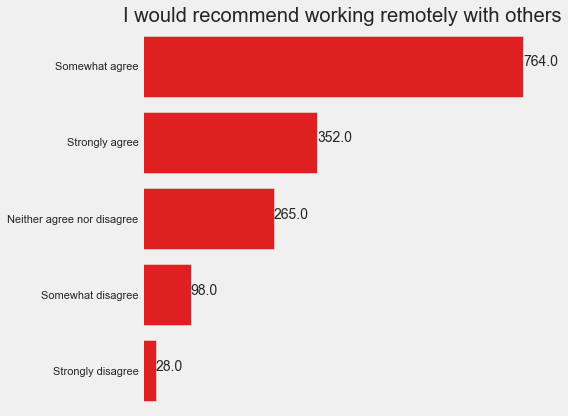

In [30]:
"""
    Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others
    Majority of the respondents agree that they would recommend working remotely to others. 
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others",data = df_2020
                  ,order = df_2020["Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others"].value_counts().index
                   , color = "red")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("I would recommend working remotely with others")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()



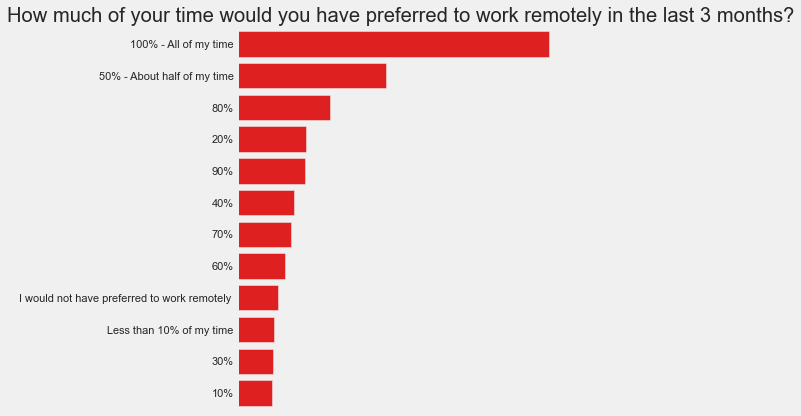

In [31]:
"""
    How much of your time would you have preferred to work remotely in the last 3 months?
    More than half of the respondents agree they would prefer to spend at least 50% of their time working remotely
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "How much of your time would you have preferred to work remotely in the last 3 months?",data = df_2020
                  ,order = df_2020["How much of your time would you have preferred to work remotely in the last 3 months?"].value_counts().index
                   , color = "red")

#show values on barplot
#show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("How much of your time would you have preferred to work remotely in the last 3 months?")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()




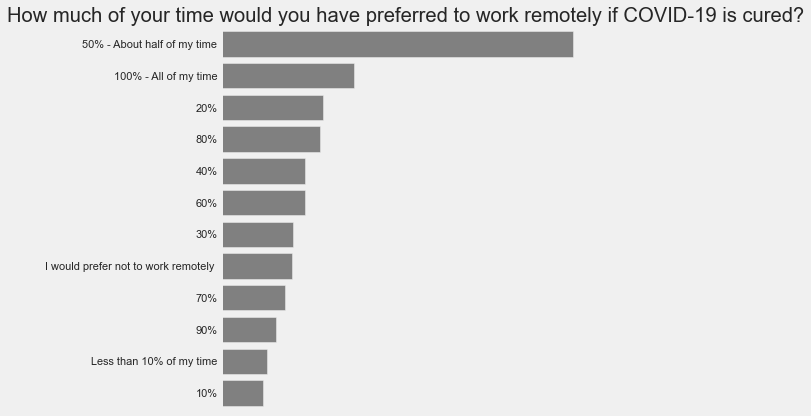

In [32]:
"""
    Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?
    Majority of the respondents want to continue working hybrid even if Covid-19 gets cured. 
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?",data = df_2020
                  ,order = df_2020["Imagine that COVID-19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?"].value_counts().index
                   , color = "grey")

#show values on barplot
#show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("How much of your time would you have preferred to work remotely if COVID-19 is cured?")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()




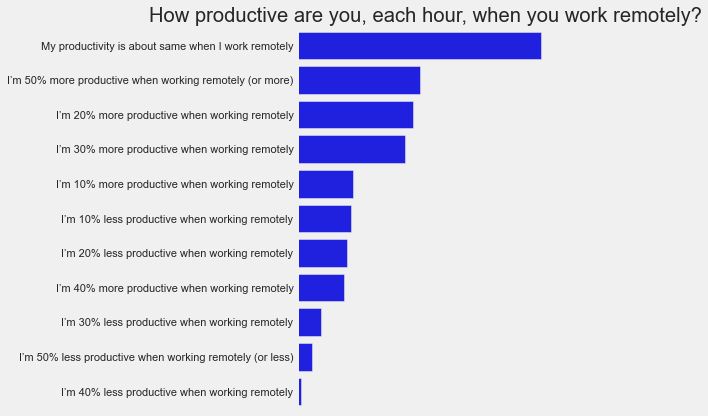

In [33]:
"""
    Please compare your productivity when you work remotely to when you work at your employers workplace. Roughly how productive are you, each hour, when you work remotely?
    majority of the respondents believe that
    1) Their productivity remains the same when working remotely or in-office
    2) Their productivity increases when working remotely
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Please compare your productivity when you work remotely to when you work at your employers workplace. Roughly how productive are you, each hour, when you work remotely?",data = df_2020
                  ,order = df_2020["Please compare your productivity when you work remotely to when you work at your employers workplace. Roughly how productive are you, each hour, when you work remotely?"].value_counts().index
                   , color = "blue")

#show values on barplot
#show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("How productive are you, each hour, when you work remotely?")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()




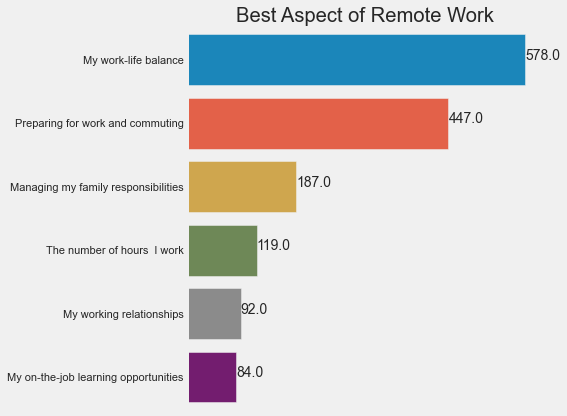

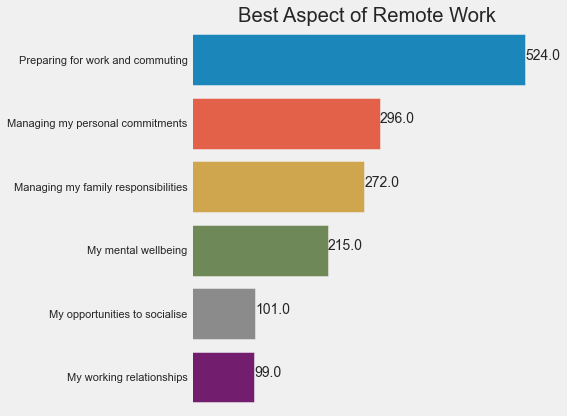

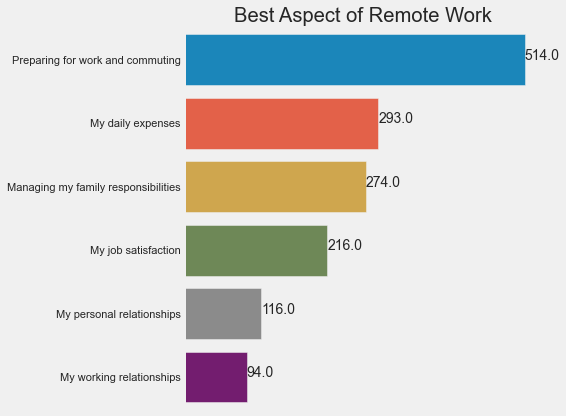

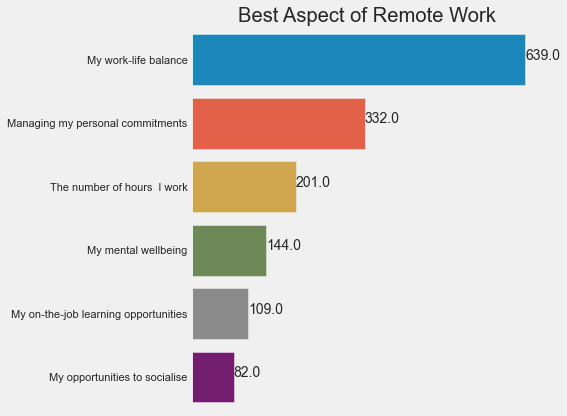

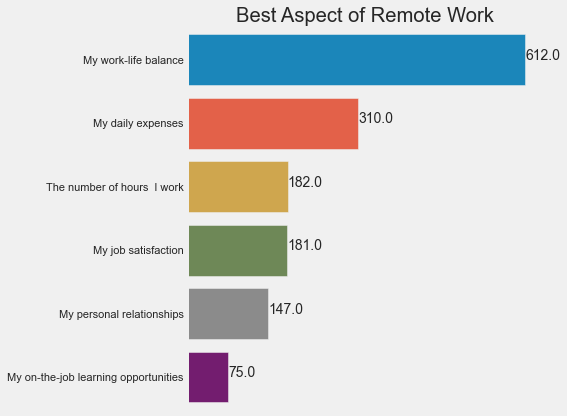

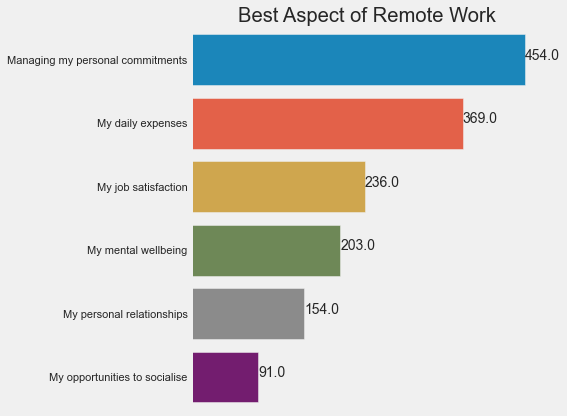

In [34]:
"""
    The best aspect of remote work are.
    1) Work-life balance
    2) Preparing and commuting to work
    3) Managing personal commitments
    4) Daily expenses
    5) Managing my family responsibilities. 
"""

def counterplot(data, col):    
    plt.figure(figsize = (8,6))
    ax = sns.countplot(y = col,data = data, order = df_2020[col].value_counts().index)
    
    show_values(ax, "h", space=0)
    
    ax.axes.xaxis.set_visible(False)

    plt.title("Best Aspect of Remote Work")
    plt.style.use("fivethirtyeight")
    ax.set(ylabel=None)
    ax.grid(False)

    plt.tight_layout()

counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction')




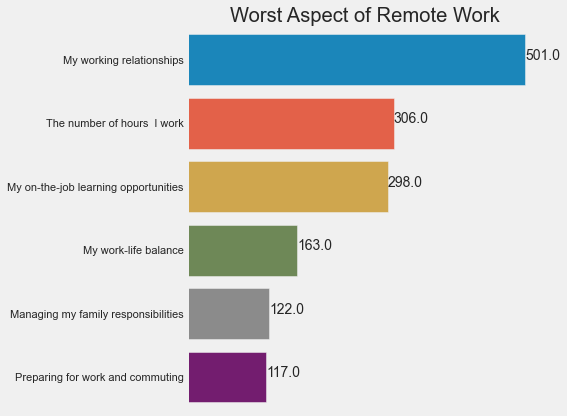

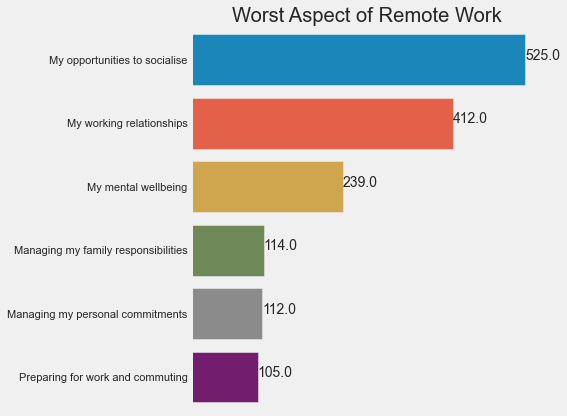

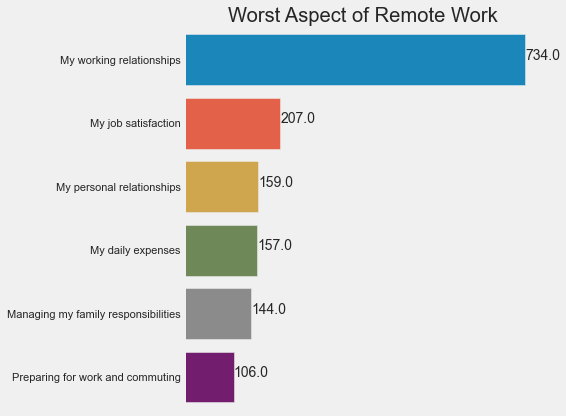

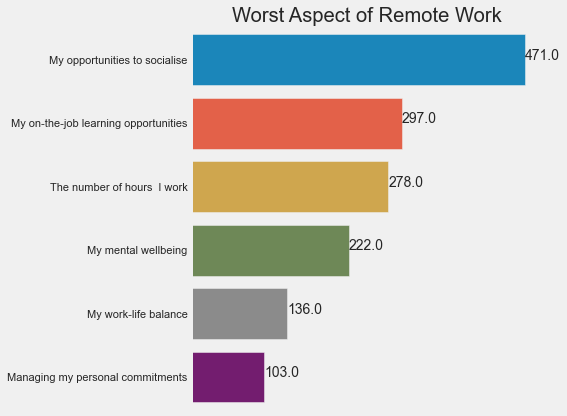

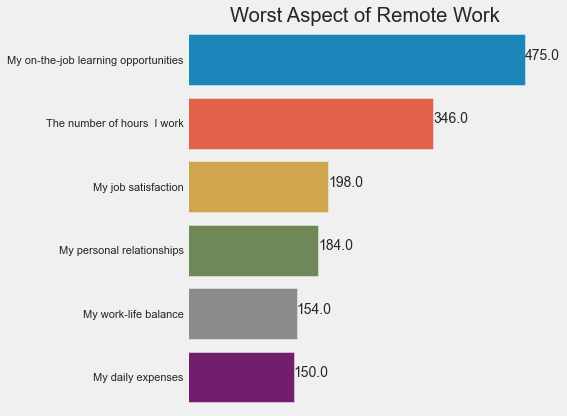

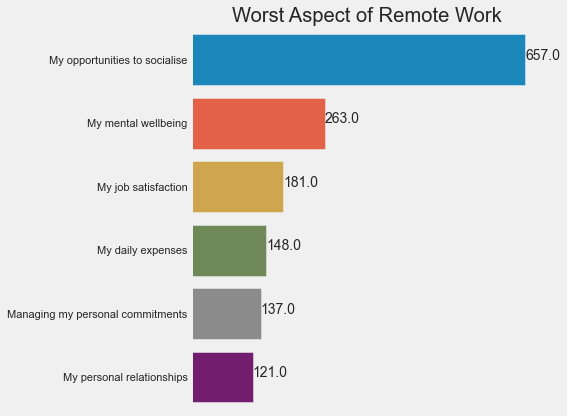

In [35]:
"""
    The worst aspect of remote work are.
    1) My working relationships
    2) My opportunity to socialize
    3) Job satisfaction
    4) My on-the-job learning opportunities
    5) My mental well-being. 
"""

def counterplot(data, col):    
    plt.figure(figsize = (8,6))
    ax = sns.countplot(y = col,data = data, order = df_2020[col].value_counts().index)
    
    show_values(ax, "h", space=0)
    
    ax.axes.xaxis.set_visible(False)

    plt.title("Worst Aspect of Remote Work")
    plt.style.use("fivethirtyeight")
    ax.set(ylabel=None)
    ax.grid(False)

    plt.tight_layout()
    
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction')
counterplot(df_2020, 'Compare remote working to working at your employer’s workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction')




## Survey Analysis for 2021

In [36]:
df_2021.head(3)

,Response ID,What year were you born?,What is your gender?,"How long have you been in your current job? If you have more than one job, please answer all questions for your main job.",Which of the following best describes your industry?,Which of the following best describes your current occupation?,How many people are currently employed by your organisation?,Which of the following best describes your household?,Metro or Regional,"Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year? This means October-December 2020 If you work a 5 day week, each day of remote working equals 20% of your time.","How much of your work time would you have preferred to work remotely during the last quarter of last year? This means October-December 2020 If you work a 5 day week, each day of remote working equals 20% of your time.","Thinking about your current job, how much of your work time have you spent working remotely this year? If you work a 5 day week, each day of remote working equals 20% of your time.","How much of your work time would you have preferred to work remotely so far this year? If you work a 5 day week, each day of remote working equals 20% of your time.","Imagine that COVID-19 is cured or eradicated. Going forward, how much of your work time would you prefer to work remotely? If you work a 5 day week, each day of remote working equals 20% of your time.",These questions are about the remote working arrangements in your organisation. Has your employer changed or updated their policy on remote work since COVID-19? This means since February/March 2020,"In the past 6 months, have you ever worked part of your day remotely, and part of it at your employer workplace?",How often do you work this way?,How often would you like to work this way?,Does your employer have a policy that workers must be at the employer workplace some of the time?,"How much of your work time does your employer policy require you to be at their workplace? If you work a 5 day week, 1 day equals 20% of your work time.","Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements? Please select a single response per row - My employer remote working policy suits me","Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements? Please select a single response per row - I get to choose how much work I do remotely","Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements? Please select a single response per row - I choose which days I work remotely","Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements? Please select a single response per row - My direct manager has discretion to allow or deny remote work",How do you feel about your employer remote working policy?,"Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - My organisation encouraged people to work remotely","Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - My organisation was well prepared for me to work remotely","Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - It was common for people in my organisation to work remotely","Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - It was easy to get permission to work remotely","Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? P

In [37]:
"""
 Dropping irrelavant columns for my analysis
"""

df_2021.drop(["Response ID", "Which of the following best describes your current occupation?", 
              ], axis = 1, inplace = True)

In [38]:
"""
    Renaming the columns
"""
df_2021.rename(columns = {"What year were you born?":"Date of Birth"
                          , "What is your gender?":"Gender"}, inplace = True)

In [39]:
#Create a new column for this year
df_2021['Current Year'] = dt.datetime.now().year

In [40]:
#Create a new column to know the Age of each respondent
df_2021["Age"] = df_2021['Current Year'] - df_2021["Date of Birth"] 

In [41]:
#drop the current year column
df_2021.drop(columns = {"Current Year"}, inplace = True)

In [42]:
df_2021.head(1)

,Date of Birth,Gender,"How long have you been in your current job? If you have more than one job, please answer all questions for your main job.",Which of the following best describes your industry?,How many people are currently employed by your organisation?,Which of the following best describes your household?,Metro or Regional,"Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year? This means October-December 2020 If you work a 5 day week, each day of remote working equals 20% of your time.","How much of your work time would you have preferred to work remotely during the last quarter of last year? This means October-December 2020 If you work a 5 day week, each day of remote working equals 20% of your time.","Thinking about your current job, how much of your work time have you spent working remotely this year? If you work a 5 day week, each day of remote working equals 20% of your time.","How much of your work time would you have preferred to work remotely so far this year? If you work a 5 day week, each day of remote working equals 20% of your time.","Imagine that COVID-19 is cured or eradicated. Going forward, how much of your work time would you prefer to work remotely? If you work a 5 day week, each day of remote working equals 20% of your time.",These questions are about the remote working arrangements in your organisation. Has your employer changed or updated their policy on remote work since COVID-19? This means since February/March 2020,"In the past 6 months, have you ever worked part of your day remotely, and part of it at your employer workplace?",How often do you work this way?,How often would you like to work this way?,Does your employer have a policy that workers must be at the employer workplace some of the time?,"How much of your work time does your employer policy require you to be at their workplace? If you work a 5 day week, 1 day equals 20% of your work time.","Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements? Please select a single response per row - My employer remote working policy suits me","Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements? Please select a single response per row - I get to choose how much work I do remotely","Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements? Please select a single response per row - I choose which days I work remotely","Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements? Please select a single response per row - My direct manager has discretion to allow or deny remote work",How do you feel about your employer remote working policy?,"Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - My organisation encouraged people to work remotely","Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - My organisation was well prepared for me to work remotely","Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - It was common for people in my organisation to work remotely","Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - It was easy to get permission to work remotely","Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements? Please select a single response per row - I could easily collaborate with colleagues when working rem

In [43]:
df_2021['Now think about the productivity of the employees you manage.   Roughly how productive are the employees you manage, each hour, when they work remotely? '].value_counts()









I’m 50% more productive when working remotely (or more)     125
I’m 30% more productive when working remotely               117
I’m 20% more productive when working remotely               114
My productivity is about same when I work remotely          112
I’m 40% more productive when working remotely                73
I’m 10% more productive when working remotely                69
I’m 20% less productive when working remotely                33
I’m 10% less productive when working remotely                27
I’m 30% less productive when working remotely                17
I’m 50% less productive when working remotely (or worse)      6
I’m 40% less productive when working remotely                 4
Name: Now think about the productivity of the employees you manage.   Roughly how productive are the employees you manage, each hour, when they work remotely? , dtype: int64

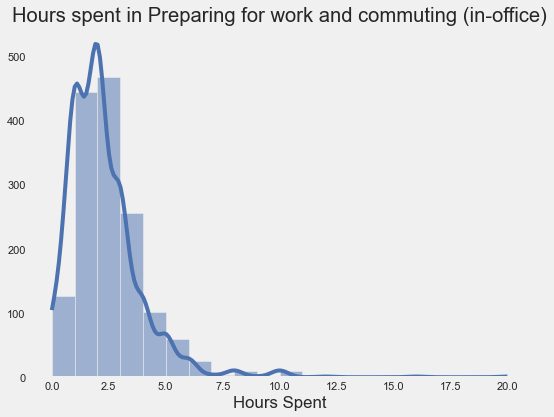

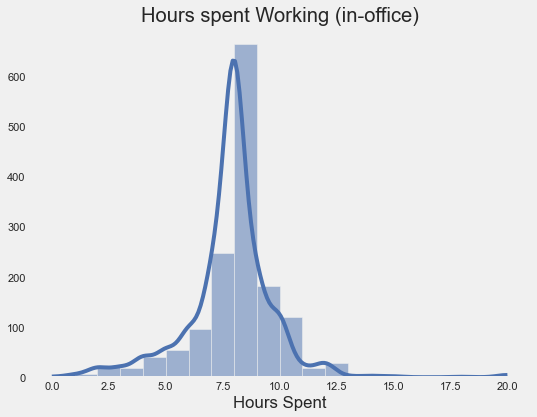

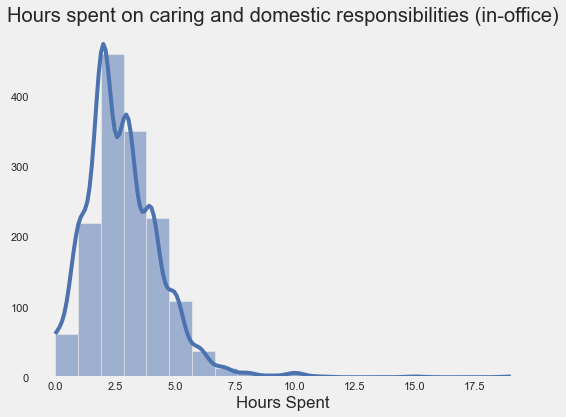

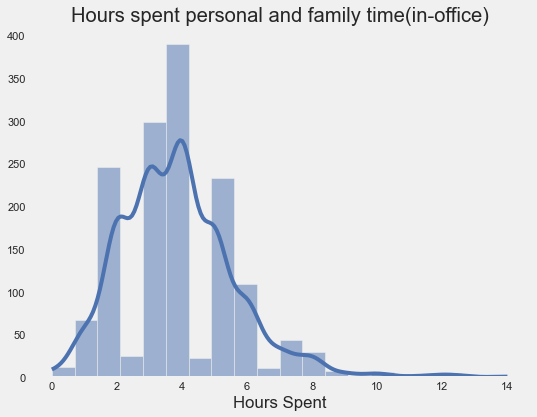

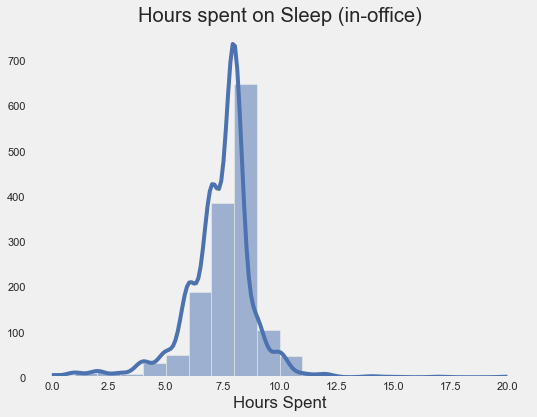

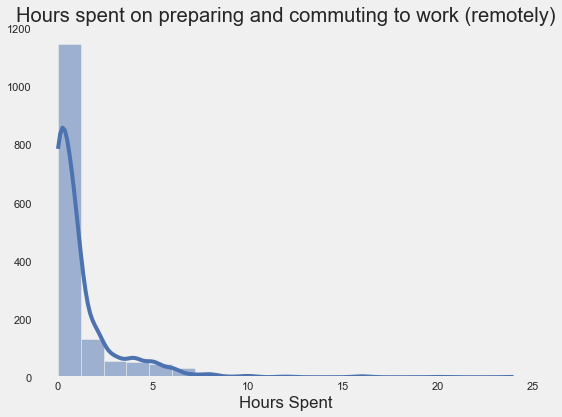

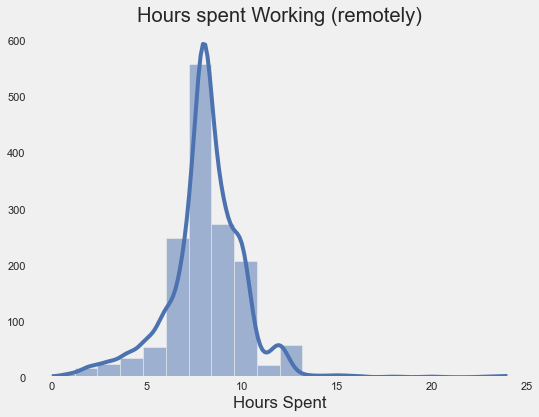

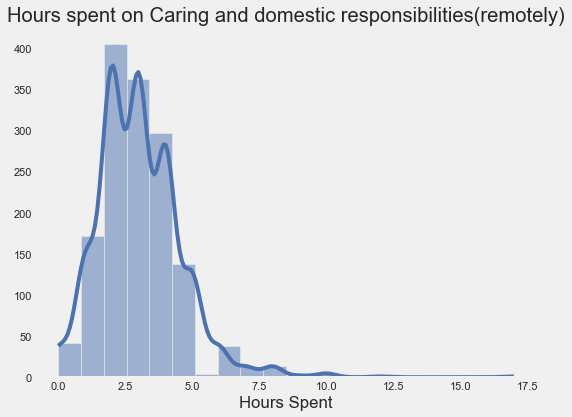

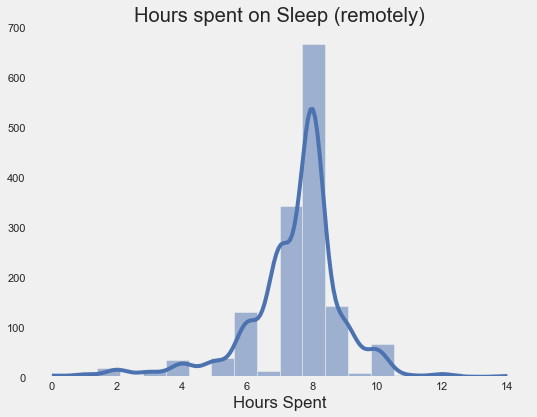

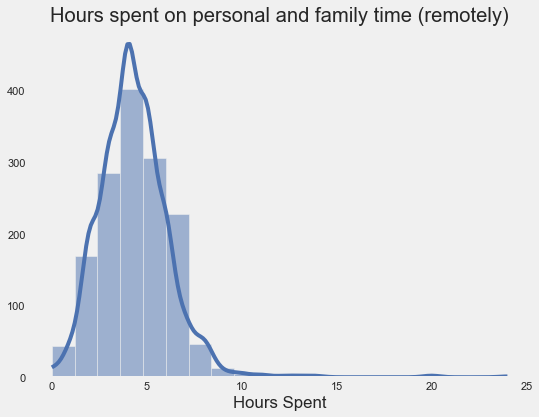

In [45]:
"""
    To check the skewness of those numerical columns
    Clearly, they are right skewed so using a mean as a central tendency would be incorrect
"""

outlier(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of  1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Preparing for work and commuting'
       , "Hours spent in Preparing for work and commuting (in-office)")

outlier(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Working',
       "Hours spent Working (in-office)")

outlier(df_2021,'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Caring and domestic responsibilities' ,
       "Hours spent on caring and domestic responsibilities (in-office)")

outlier(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Personal and family time', 
       "Hours spent personal and family time(in-office)")

outlier(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Sleep' ,
       "Hours spent on Sleep (in-office)")

outlier(df_2021, 'Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Preparing for work and commuting',
       "Hours spent on preparing and commuting to work (remotely)")

outlier(df_2021, 'Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Working',
       "Hours spent Working (remotely)")

outlier(df_2021, 'Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Caring and domestic responsibilities',
       "Hours spent on Caring and domestic responsibilities(remotely)")

outlier(df_2021, "Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Sleep",
       "Hours spent on Sleep (remotely)")

outlier(df_2021,'Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Personal and family time' 
       , "Hours spent on personal and family time (remotely)")



In [46]:
"""
    Average. I used Median instead of mode because of outliers (the right skewness tells us so)
"""

def avg(data, col):
    average = data[col].median()
    return (average)


print("After the Pandemic")
print("="*100)
print("Average time spent preparing and commuting to work (in-office):", avg(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of  1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Preparing for work and commuting'), "hours")
print("Average time spent on personal and family time (in-office):", avg(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Personal and family time'), "hours")
print("Average time spent working in-office:", avg(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Working'), "hours")
print("Average time spent on caring and domestic responsibilities (in-office):", avg(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Caring and domestic responsibilities'), "hours")
print("Average time spent sleeping in-office:", avg(df_2021, 'Think about your experience this year. On a day when you attend your employer workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Sleep'), "hours")

print("\n\n")

print("Average time spent preparing and commuting for work (remote):", avg(df_2021, 'Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Preparing for work and commuting'), "hours")
print("Average time spent working remotely:", avg(df_2021, 'Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Working'), "hours")
print("Average time spent on personal and family time (remote):", avg(df_2021, 'Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Personal and family time'), "hours")
print("Average time spent on caring and domestic responsibilities (remote):", avg(df_2021, 'Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Caring and domestic responsibilities'), "hours")
print("Average time spent sleeping (remote):", avg(df_2021, "Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities?  For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Sleep"), "hours")



After the Pandemic
Average time spent preparing and commuting to work (in-office): 2.0 hours
Average time spent on personal and family time (in-office): 4.0 hours
Average time spent working in-office: 8.0 hours
Average time spent on caring and domestic responsibilities (in-office): 3.0 hours
Average time spent sleeping in-office: 8.0 hours



Average time spent preparing and commuting for work (remote): 0.5 hours
Average time spent working remotely: 8.0 hours
Average time spent on personal and family time (remote): 4.0 hours
Average time spent on caring and domestic responsibilities (remote): 3.0 hours
Average time spent sleeping (remote): 8.0 hours


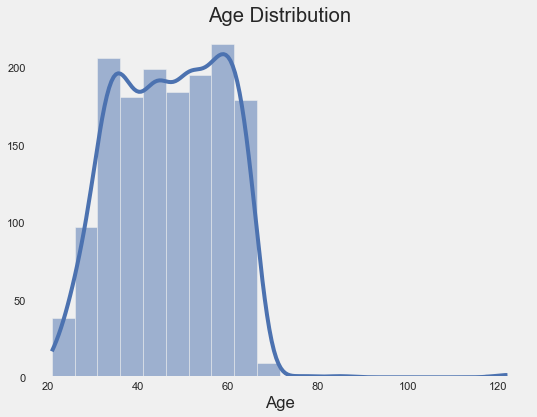

The average age of the respondents: 42


In [47]:
"""
    Because of the presence of outliers in the age, we can't use the mean to get the average age.
    Hence, the average age of the respondents is 47 years. This shows, we're dealing with mid-senior level professionals
"""


plt.figure(figsize = (8,6))
ax = sns.histplot(
        data=df_2020, x="Age", kde=True, bins = 20)

plt.xlabel("Age")
plt.title("Age Distribution")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None)
ax.grid(False)
plt.show()

#show the average age of the respondents
print("The average age of the respondents: %d"%(df_2021["Age"].median()))


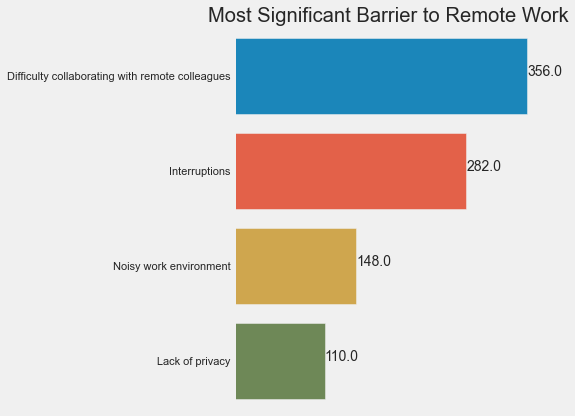

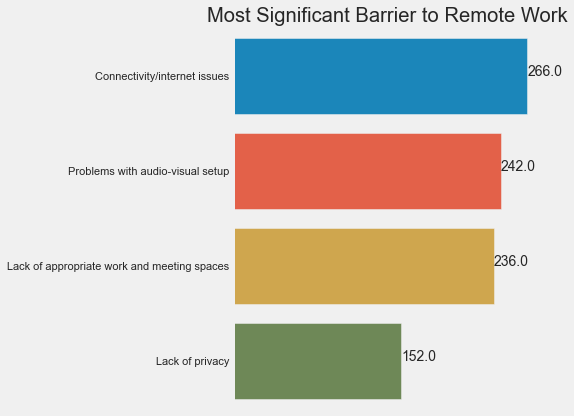

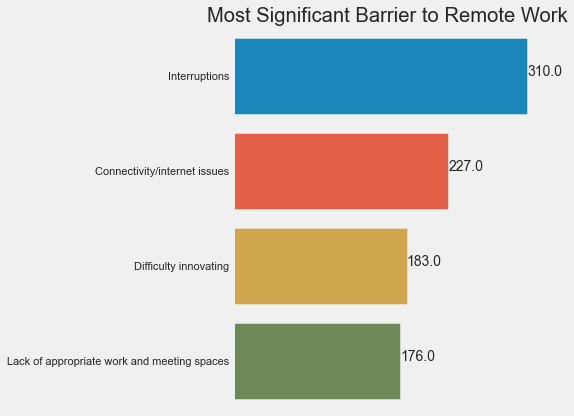

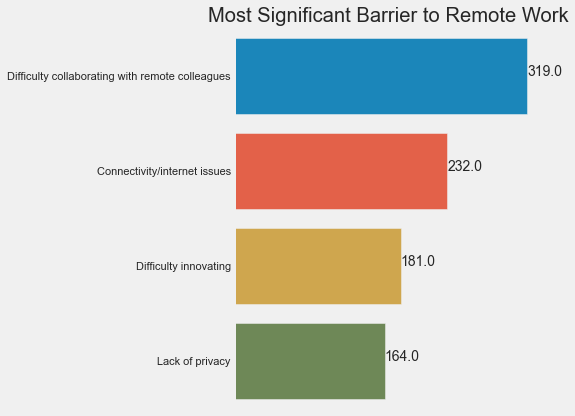

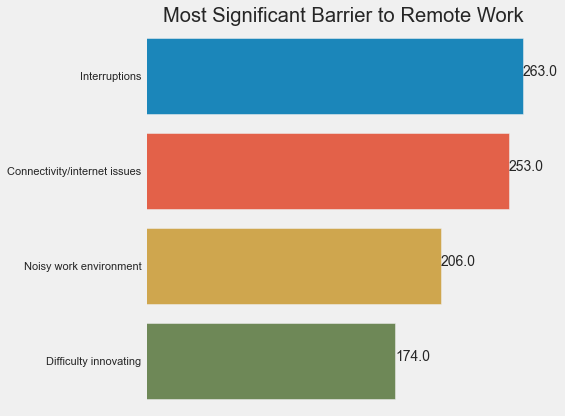

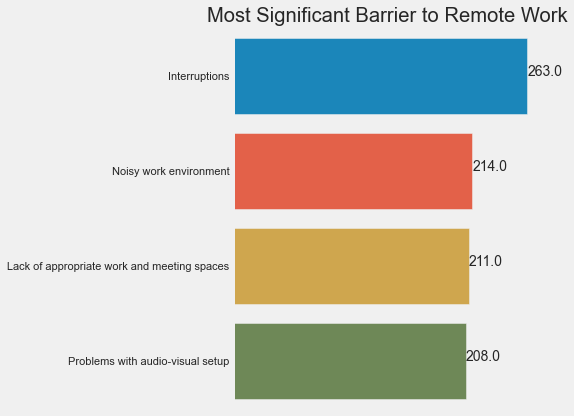

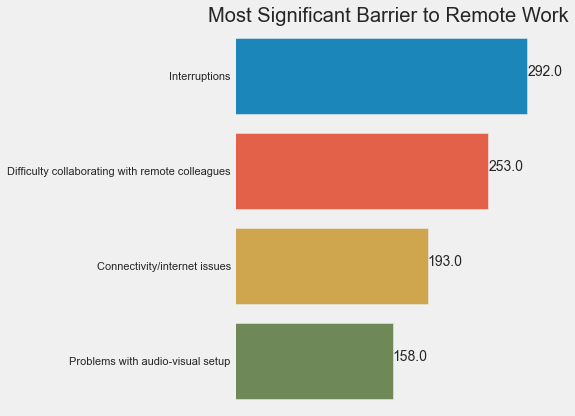

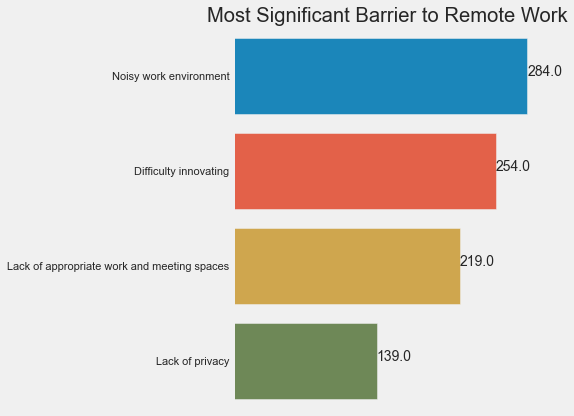

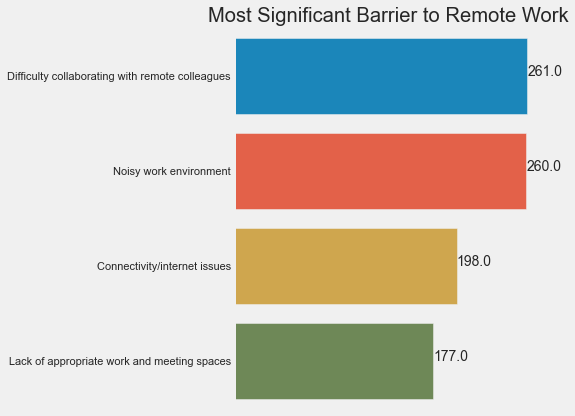

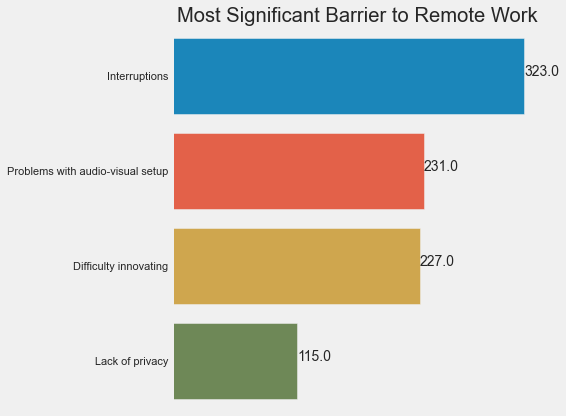

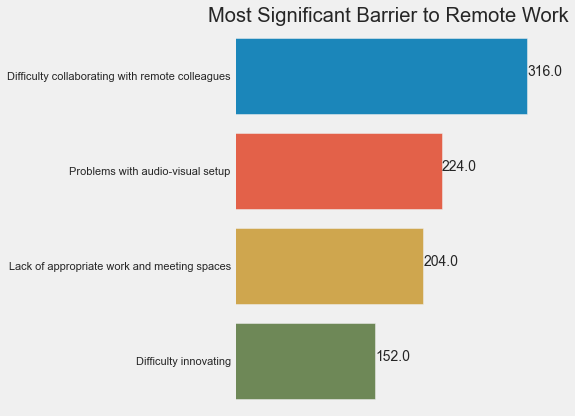

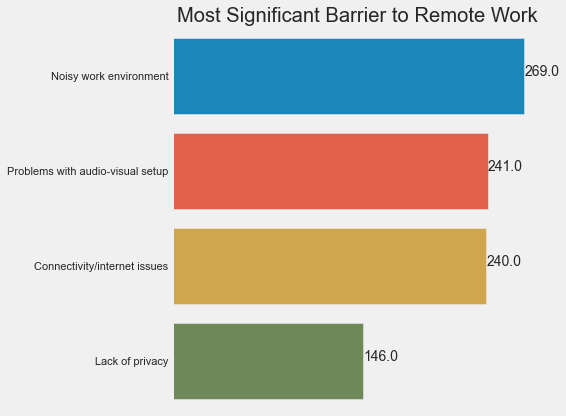

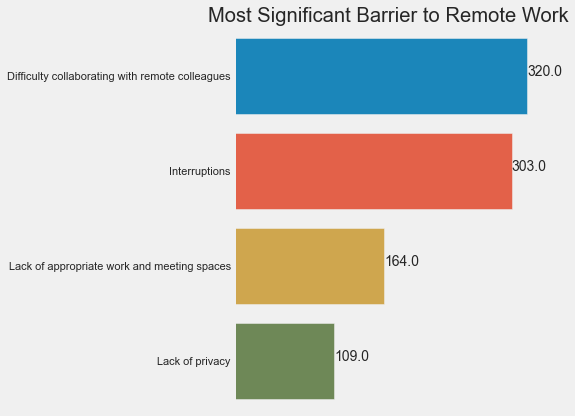

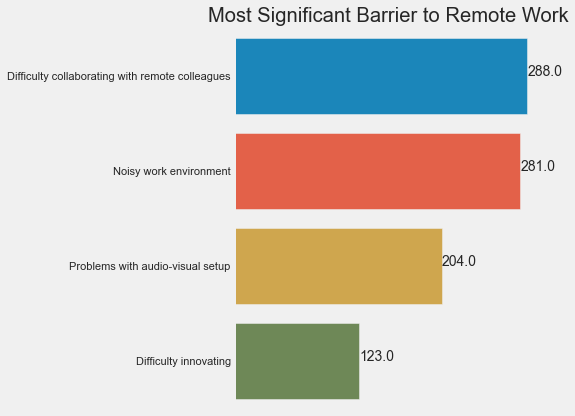

In [48]:
#countplot function
"""
    The biggest barriers to remote work are:
    1) Difficulty collaborating with remote colleagues
    2) Connectivity/Internet Issues
    3) Interruptions
    4) Noisy Environment
    5) Problems with Audio-visual setup
"""
def counterplot(data, col):    
    plt.figure(figsize = (8,6))
    ax = sns.countplot(y = col,data = data, order = df_2021[col].value_counts().index)
    
    show_values(ax, "h", space=0)
    
    ax.axes.xaxis.set_visible(False)

    plt.xlabel("Frequency")
    plt.title("Most Significant Barrier to Remote Work")
    plt.style.use("fivethirtyeight")
    ax.set(ylabel=None)
    ax.grid(False)

    plt.tight_layout()


counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Noisy work environment ; Interruptions ; Difficulty collaborating with remote colleagues ; Lack of privacy")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Connectivity/internet issues ; Lack of appropriate work and meeting spaces ; Problems with audio-visual setup ; Lack of privacy")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Interruptions ; Connectivity/internet issues ; Lack of appropriate work and meeting spaces ; Difficulty innovating")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Connectivity/internet issues ; Difficulty collaborating with remote colleagues ; Difficulty innovating ; Lack of privacy")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Noisy work environment ; Interruptions ; Connectivity/internet issues ; Difficulty innovating")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Noisy work environment ; Interruptions ; Lack of appropriate work and meeting spaces ; Problems with audio-visual setup")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Interruptions ; Connectivity/internet issues ; Problems with audio-visual setup ; Difficulty collaborating with remote colleagues")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Noisy work environment ; Lack of appropriate work and meeting spaces ; Difficulty innovating ; Lack of privacy")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Noisy work environment ; Connectivity/internet issues ; Lack of appropriate work and meeting spaces ; Difficulty collaborating with remote colleagues")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Interruptions ; Problems with audio-visual setup ; Difficulty innovating ; Lack of privacy")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Lack of appropriate work and meeting spaces ; Problems with audio-visual setup ; Difficulty collaborating with remote colleagues ; Difficulty innovating")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Noisy work environment ; Connectivity/internet issues ; Problems with audio-visual setup ; Lack of privacy")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Interruptions ; Lack of appropriate work and meeting spaces ; Difficulty collaborating with remote colleagues ; Lack of privacy")
counterplot(df_2021, "Think about when you worked at your employer workplace and some of your colleagues were working remotely. What were the biggest barriers of working this way? - Noisy work environment ; Problems with audio-visual setup ; Difficulty collaborating with remote colleagues ; Difficulty innovating")


In [49]:
#Industry distribution.

"""
    Most of the respondents work in the Financial and Insurance, 
    Second is professional, scientific, and technical services
    Third is Education and Training.
"""

df_2021["Which of the following best describes your industry?"].value_counts()

Financial and Insurance                     204
Professional, Scientific and Technical      163
Education and Training                      150
Information Media and Telecommunications    149
Other Services                              132
Health Care and Social Assistance           116
Retail Trade                                 86
Construction                                 71
Administrative and Support                   70
Manufacturing                                67
Public Administration and Safety             66
Wholesale Trade                              50
Transport, Postal and Warehousing            47
Arts and Recreation                          35
Electricity, Gas, Water and Waste            28
Accommodation and Food                       27
Rental, Hiring and Real Estate               22
Mining                                       15
Agriculture, Forestry and Fishing            14
Name: Which of the following best describes your industry?, dtype: int64

/Users/victoragboli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


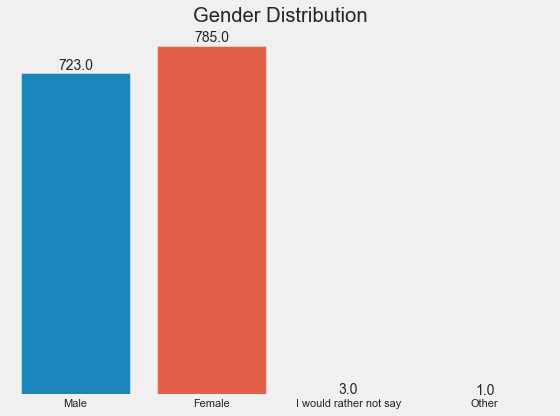

In [50]:
#Gender Dsitribution. We had more females than males for this survey. 

plt.figure(figsize = (8,6))
ax = sns.countplot(df_2021["Gender"])
plt.title("Gender Distribution")
plt.ylabel("Frequency")
plt.style.use("fivethirtyeight")
ax.set(xlabel=None)
ax.grid(False)
ax.axes.yaxis.set_visible(False)
show_values(ax, "v", space=0)


plt.tight_layout()

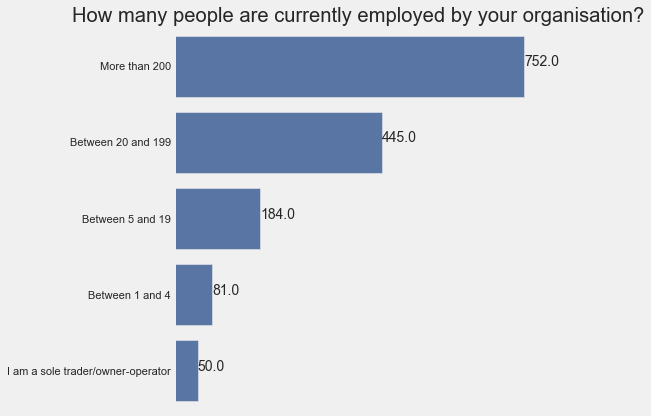

In [51]:
"""
    Most of the respondents work for organizations with large teams. 
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "How many people are currently employed by your organisation?",data = df_2021
                  ,order = df_2021["How many people are currently employed by your organisation?"].value_counts().index
                   , color = "b")

plt.title("How many people are currently employed by your organisation?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)
ax.axes.xaxis.set_visible(False)
show_values(ax, "h", space=0)


plt.tight_layout()


In [52]:
df_2021["How many people are currently employed by your organisation?"].value_counts().index

Index(['More than 200', 'Between 20 and 199', 'Between 5 and 19',
       'Between 1 and 4', 'I am a sole trader/owner-operator'],
      dtype='object')

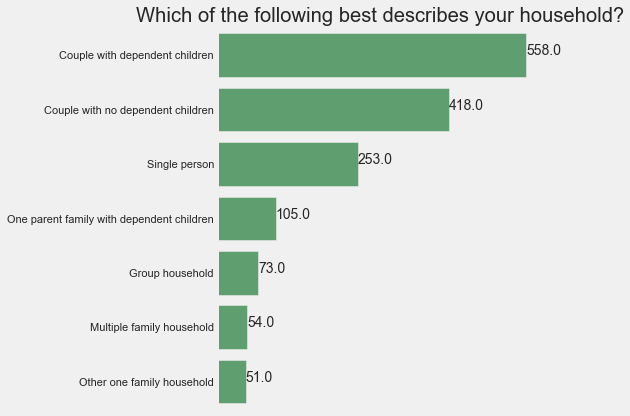

In [53]:
"""
    Majority of the respondents are
    1) Couples with dependent children
    2) Couples with no dependent children
    3) Single persons.
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Which of the following best describes your household?",data = df_2021
                  ,order = df_2021["Which of the following best describes your household?"].value_counts().index
                   , color = "g")

plt.title("Which of the following best describes your household?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None)
ax.grid(False)
ax.axes.xaxis.set_visible(False)
show_values(ax, "h", space=0)

plt.tight_layout()

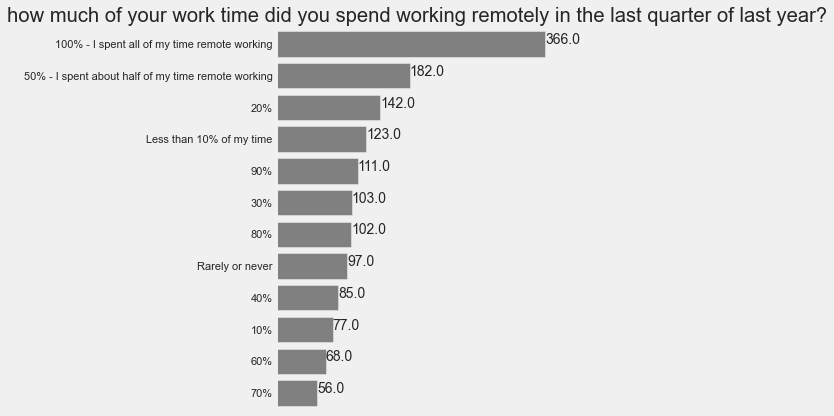

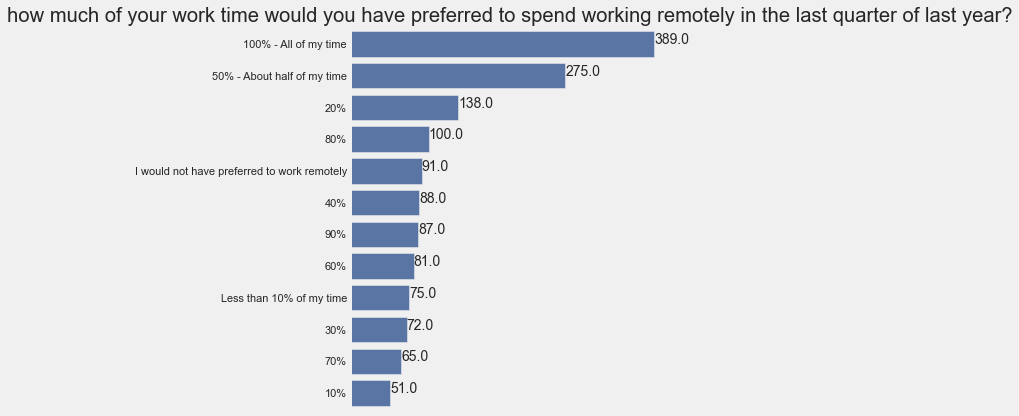

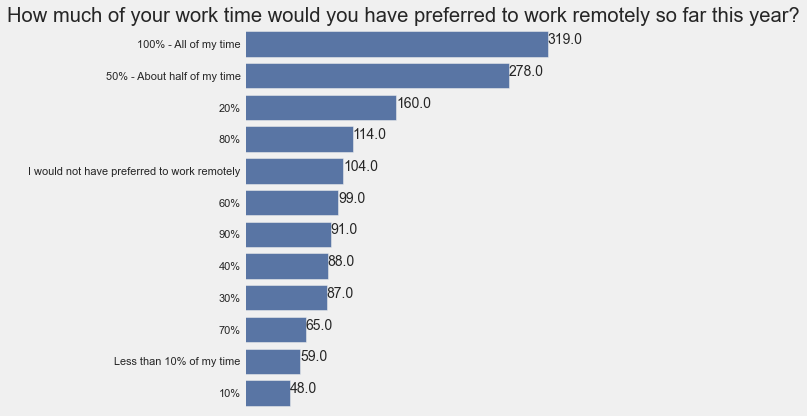

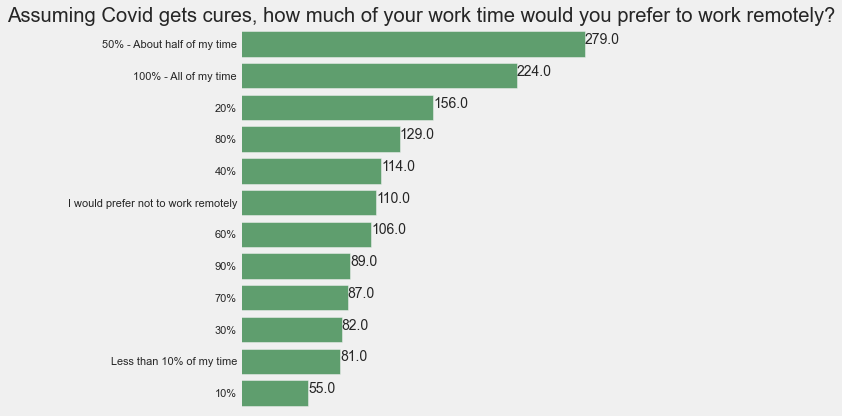

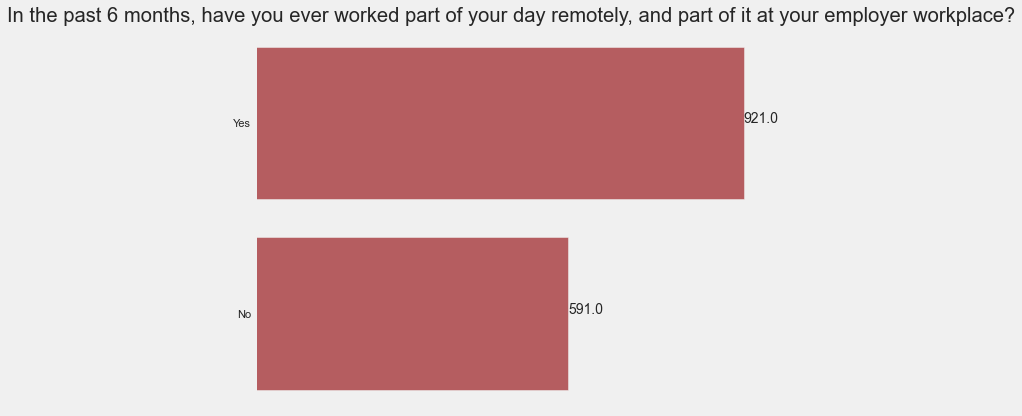

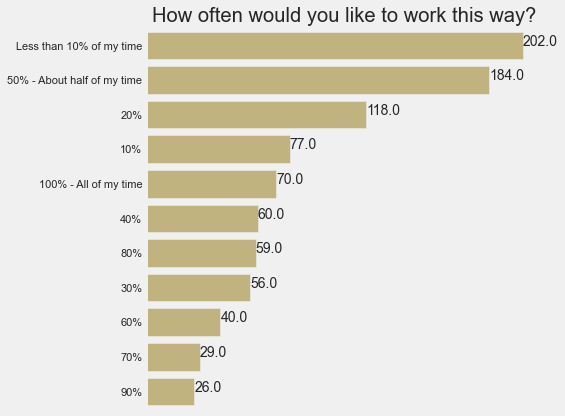

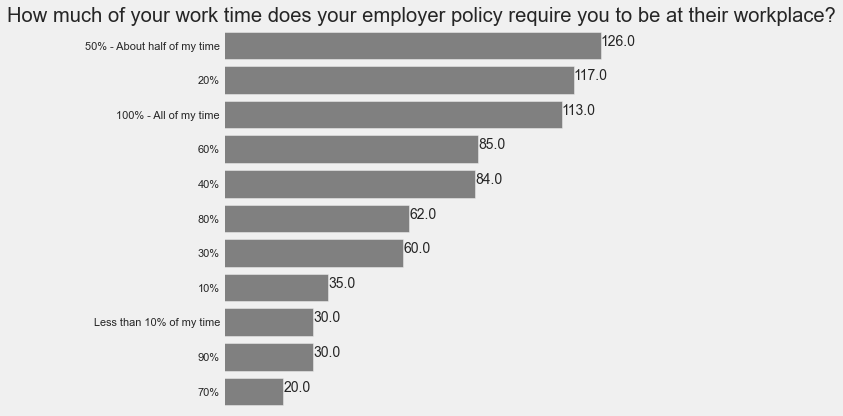

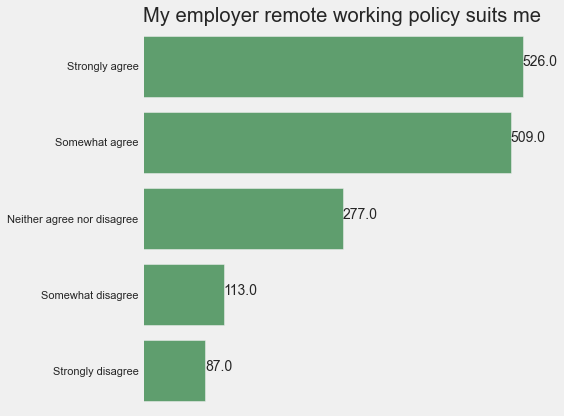

In [54]:
"""
    How long have you been in your current job?
    - Majority of the respondents said they spent the last quarter of last year working remotely 
    - Majority of the respondents said they would prefer spending 100% of their time working remotely last quarter
    -
    -
    -
    -
"""

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.",data = df_2021
                  ,order = df_2021["Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time."].value_counts().index
                   , color = "grey")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("how much of your work time did you spend working remotely in the last quarter of last year?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

#######

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "How much of your work time would you have preferred to work remotely during the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.",data = df_2021
                  ,order = df_2021["How much of your work time would you have preferred to work remotely during the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time."].value_counts().index
                   , color = "b")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("how much of your work time would you have preferred to spend working remotely in the last quarter of last year?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

##
plt.figure(figsize = (8,6))
ax = sns.countplot(y = "How much of your work time would you have preferred to work remotely so far this year?  If you work a 5 day week, each day of remote working equals 20% of your time.",data = df_2021
                  ,order = df_2021["How much of your work time would you have preferred to work remotely so far this year?  If you work a 5 day week, each day of remote working equals 20% of your time."].value_counts().index
                   , color = "b")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("How much of your work time would you have preferred to work remotely so far this year?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

##

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.",data = df_2021
                  ,order = df_2021["Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time."].value_counts().index
                   , color = "g")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("Assuming Covid gets cures, how much of your work time would you prefer to work remotely?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

###

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "In the past 6 months, have you ever worked part of your day remotely, and part of it at your employer workplace?",data = df_2021
                  ,order = df_2021["In the past 6 months, have you ever worked part of your day remotely, and part of it at your employer workplace?"].value_counts().index
                   , color = "r")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("In the past 6 months, have you ever worked part of your day remotely, and part of it at your employer workplace?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

##

plt.figure(figsize = (8,6))
ax = sns.countplot(y = "How often would you like to work this way?",data = df_2021
                  ,order = df_2021["How often would you like to work this way?"].value_counts().index
                   , color = "y")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("How often would you like to work this way?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

##
plt.figure(figsize = (8,6))
ax = sns.countplot(y = "How much of your work time does your employer policy require you to be at their workplace?  If you work a 5 day week, 1 day equals 20% of your work time.",data = df_2021
                  ,order = df_2021["How much of your work time does your employer policy require you to be at their workplace?  If you work a 5 day week, 1 day equals 20% of your work time."].value_counts().index
                   , color = "grey")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("How much of your work time does your employer policy require you to be at their workplace?")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()

##
plt.figure(figsize = (8,6))
ax = sns.countplot(y = "Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements?   Please select a single response per row   - My employer remote working policy suits me",data = df_2021
                  ,order = df_2021["Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements?   Please select a single response per row   - My employer remote working policy suits me"].value_counts().index
                   , color = "g")

#show values on barplot
show_values(ax, "h", space=0)

ax.axes.xaxis.set_visible(False)

plt.title("My employer remote working policy suits me")
plt.xlabel("Count")
plt.style.use("fivethirtyeight")
ax.set(ylabel=None, xlabel = None)
ax.grid(False)

plt.tight_layout()




In [55]:
df_2021["Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements?   Please select a single response per row   - I get to choose how much work I do remotely"].value_counts()


Somewhat agree                461
Strongly agree                399
Neither agree nor disagree    244
Strongly disagree             208
Somewhat disagree             200
Name: Thinking about your employer policy on remote working, how strongly do you agree or disagree with the following statements?   Please select a single response per row   - I get to choose how much work I do remotely, dtype: int64

In [56]:
df_2021["Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?   Please select a single response per row   - Working remotely reduces my chances of promotion"].value_counts()


Neither agree nor disagree    511
Somewhat disagree             309
Somewhat agree                279
Strongly disagree             264
Strongly agree                149
Name: Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?   Please select a single response per row   - Working remotely reduces my chances of promotion, dtype: int64

In [57]:
df_2021["Imagine that COVID-19 is cured or eradicated.    How likely would you consider the following statements?   - My employer would encourage more remote working"].value_counts()


Neither unlikely or likely    410
Somewhat likely               370
Somewhat unlikely             280
Very likely                   239
Very unlikely                 213
Name: Imagine that COVID-19 is cured or eradicated.    How likely would you consider the following statements?   - My employer would encourage more remote working, dtype: int64

In [58]:
df_2021["How strongly do you agree or disagree with the following statements?   - On days when I work remotely I feel better"].value_counts()


Somewhat agree                495
Neither agree nor disagree    446
Strongly agree                404
Somewhat disagree             122
Strongly disagree              45
Name: How strongly do you agree or disagree with the following statements?   - On days when I work remotely I feel better, dtype: int64

In [59]:
df_2021["How strongly do you agree or disagree with the following statements?    - Offering remote work helps me retain employees"].value_counts()


Somewhat agree                255
Strongly agree                152
Neither agree nor disagree    141
Somewhat disagree              31
Strongly disagree              16
Name: How strongly do you agree or disagree with the following statements?    - Offering remote work helps me retain employees, dtype: int64

In [60]:
df_2021["This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.    Please compare your productivity when you work remotely to when you work at your employer workplace.    Roughly how productive are you, each hour, when you work remotely?"].value_counts()


My productivity is about same when I work remotely          330
I’m 50% more productive when working remotely (or more)     278
I’m 30% more productive when working remotely               237
I’m 20% more productive when working remotely               229
I’m 40% more productive when working remotely               111
I’m 10% more productive when working remotely               111
I’m 20% less productive when working remotely                74
I’m 10% less productive when working remotely                71
I’m 30% less productive when working remotely                38
I’m 50% less productive when working remotely (or worse)     23
I’m 40% less productive when working remotely                10
Name: This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.    Please compare your productivity when you work remotely to when you work at your emplo

In [61]:
df_2021["How strongly do you agree or disagree with the following statements?    - My team works well together when they work remotely"].value_counts()


Somewhat agree                279
Strongly agree                159
Neither agree nor disagree    102
Somewhat disagree              44
Strongly disagree              11
Name: How strongly do you agree or disagree with the following statements?    - My team works well together when they work remotely, dtype: int64

In [62]:
df_2021["How strongly do you agree or disagree with the following statements?    - I find it easy to manage employees remotely (e.g. tasking and monitoring progress)"].value_counts()


Somewhat agree                241
Strongly agree                163
Neither agree nor disagree    105
Somewhat disagree              66
Strongly disagree              20
Name: How strongly do you agree or disagree with the following statements?    - I find it easy to manage employees remotely (e.g. tasking and monitoring progress), dtype: int64

In [63]:


df_2021["Now think about the productivity of the employees you manage.   Roughly how productive are the employees you manage, each hour, when they work remotely? "].value_counts()








I’m 50% more productive when working remotely (or more)     125
I’m 30% more productive when working remotely               117
I’m 20% more productive when working remotely               114
My productivity is about same when I work remotely          112
I’m 40% more productive when working remotely                73
I’m 10% more productive when working remotely                69
I’m 20% less productive when working remotely                33
I’m 10% less productive when working remotely                27
I’m 30% less productive when working remotely                17
I’m 50% less productive when working remotely (or worse)      6
I’m 40% less productive when working remotely                 4
Name: Now think about the productivity of the employees you manage.   Roughly how productive are the employees you manage, each hour, when they work remotely? , dtype: int64

### Demography of the Respondents

**2020**

1. The average age of the respondents is 47 years. 
2. Most of the respondents work in the professional, scientific, and technical services, financial services, and education. 
3. We have more male respondents than female. 
4. 49% of the respondents work in an organization with a staff strength of 200 and above. 
5. 37% of the respondents are couples with dependent children, and 33% of respondents are couples with no dependent children. 
6. 53% of the respondents have been at their current job for more than 5 years. 

**2021**

1. The average age of the respondents is 42 years. 
2. Most of the respondents work in the finance & insurance, professional and scientific, and education. 
3. We have more female respondents than male. 
4. 49.7% of the respondents work in an organization with a staff strength of 200 and above. 
5. 36.9% of the respondents are couples with dependent children, and 22.6% of respondents are couples with no dependent children. 

### How has Covid Pandemic impacted the amount of work done remotely? What can be expected post-pandemic?
   Due to the COVID, employees have worked remotely, spending less time preparing and commuting to work, but their working hours and time dedicated to personal & family time, domestic responsibiities remains the same. Also, COVID brought work-life balance, saved expenses for the employees but it hindered their ability to socialize, utilize their on-the-job learning with their colleagues, affected their mental health, and ultimately, their job satisfaction. 

   Shockingly, post-COVID, majority of the employees agree that they would have loved to spend the last quarter of last year working remotely, and going forward, they would love a mix of remote and in-person work routine. This is a policy their employers brought due to COVID and they agreed the policy is fine with them. Also, working remotely (full and part-time) makes employees more active, feel good, and more productive. Working remotely doesn't in any way impact their chances of promotion, it reduces employee attrition, and make teams work better. 
   
   Hence, post-pandemic, it's expected that companies would approach working remotely on a full-time or hybrid basis (with flexibility for the employees to choose their workdays), provided barriers such as internet connectivity issues, distraction/noisy environment and difficulty to collaborating with employees can be overcome. 





### Does working remotely positively impact productivity? Are they other benefits?**

Yes, working remotely positively impacts productivity because majority of the employees agree that their productivity increased by about 10%-50% when working remotely. The other benefits are; it helps reduce time spent preparing and commuting to work by 75% and saves expenses for them. 

### How does employees use of time differ when working remotely vs. on-site

**During COVID**

For remote vs. on-site,

1. Employees spent 80% less time preparing and commuting for work.
2. Employees gained 1 hour extra for personal and familty time. 
3. They spent equal number of hours working and on domestic responsibilities. 

**Post-pandemic**

For remote vs. on-site,

1. Employees spent 75% less time preparing and commuting to work. 
2. They spent equal number of hours working, on personal & family time, sleeping, and on domestic responsibilities.